In [53]:
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


In [54]:
consumer_key = "tHOmvptuqaHHEHnh4oxGout1n"
consumer_secret = "PLebQIBm5tIHuM9tfN7IbETfkAxLYt8FmmAMSCe7cr29YAUh94"
access_token = "981328018902630400-j8bskrXr5oIWMRRRW3W98bYCDPED5kd"
access_token_secret = "o7X6gzFMHph8oVCzUej5TdXrkVxDYiwn81Gb0eT7h2hH9"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [55]:
media_sources = ['@BBC', '@CBS', '@FoxNews','@CNN','@nytimes']

def get_tweets_by_handle(twitter_handle, num_items):
    temp_tweet_list = []

    for idx, tweet in enumerate(tweepy.Cursor(api.user_timeline, id=twitter_handle ).items(num_items)):
        _tweet = tweet._json
        _tweet['tweets_ago'] = idx
        results = analyzer.polarity_scores(_tweet["text"])
        _tweet['polarity_data'] = results
        temp_tweet_list.append(_tweet)
    temp_df = pd.DataFrame([x for x in temp_tweet_list])
    temp_df['pos_sent'] = temp_df.polarity_data.map(lambda x: x.get('pos'))
    temp_df['neg_sent'] = temp_df.polarity_data.map(lambda x: x.get('neg'))
    temp_df['neu_sent'] = temp_df.polarity_data.map(lambda x: x.get('neu'))
    temp_df['compound'] = temp_df.polarity_data.map(lambda x: x.get('compound'))
    temp_df['user_screen_name'] = temp_df['user'].map(lambda x: x.get('screen_name'))
    return temp_df

dataframes = pd.concat([get_tweets_by_handle(x[1:], 100) for x in media_sources], axis=0)
dataframes

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,source,text,truncated,tweets_ago,user,pos_sent,neg_sent,neu_sent,compound,user_screen_name
0,None,None,Thu Jun 28 13:00:23 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,None,1012319800226443270,1012319800226443270,...,"<a href=""http://www.socialflow.com"" rel=""nofol...",Narcissists might be irritating attention seek...,True,0,"{'id': 19701628, 'id_str': '19701628', 'name':...",0.234,0.090,0.676,0.6369,BBC
1,None,None,Thu Jun 28 12:02:08 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 1010196688273858560, 'id_str...",81,False,None,1012305143864397825,1012305143864397825,...,"<a href=""http://www.socialflow.com"" rel=""nofol...",😲 Raghda Ezzeldin can hold her breath under wa...,False,1,"{'id': 19701628, 'id_str': '19701628', 'name':...",0.000,0.000,1.000,0.0000,BBC
2,None,None,Thu Jun 28 11:47:05 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,None,1012301353979432960,1012301353979432960,...,"<a href=""https://about.twitter.com/products/tw...",RT @BBCNews: Prince William is expected to vis...,False,2,"{'id': 19701628, 'id_str': '19701628', 'name':...",0.000,0.115,0.885,-0.3818,BBC
3,None,None,Thu Jun 28 11:16:03 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,64,False,None,1012293546534146048,1012293546534146048,...,"<a href=""http://www.socialflow.com"" rel=""nofol...",🦔 A hedgehog which it is thought could be the ...,True,3,"{'id': 19701628, 'id_str': '19701628', 'name':...",0.000,0.000,1.000,0.0000,BBC
4,None,None,Thu Jun 28 10:12:00 +0000 2018,"{'hashtags': [{'text': 'PlasticsAction', 'indi...","{'media': [{'id': 1012001639807574016, 'id_str...",30,False,None,1012277427287068672,1012277427287068672,...,"<a href=""https://studio.twitter.com"" rel=""nofo...","Plastic. It’s durable, dependable and virtuall...",False,4,"{'id': 19701628, 'id_str': '19701628', 'name':...",0.167,0.000,0.833,0.1531,BBC
5,None,None,Thu Jun 28 08:01:07 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 1009040155771068416, 'id_str...",64,False,None,1012244487689687040,1012244487689687040,...,"<a href=""http://www.socialflow.com"" rel=""nofol...",Minimalism is not just about having few posses...,False,5,"{'id': 19701628, 'id_str': '19701628', 'name':...",0.000,0.000,1.000,0.0000,BBC
6,None,None,Thu Jun 28 07:25:04 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 1012235414046822400, 'id_str...",29,False,None,1012235416001445889,1012235416001445889,...,"<a href=""http://www.socialflow.com"" rel=""nofol...",What would happen if we knew when and how we w...,False,6,"{'id': 19701628, 'id_str': '19701628', 'name':...",0.000,0.206,0.794,-0.5994,BBC
7,None,None,Thu Jun 28 07:01:02 +0000 2018,{'hashtags': [{'text': 'BBCTakingTheTemperatur...,"{'media': [{'id': 1010062358054567936, 'id_str...",75,False,None,1012229367794200576,1012229367794200576,...,"<a href=""http://www.socialflow.com"" rel=""nofol...",How do you convince millions of people living ...,False,7,"{'id': 19701628, 'id_str': '19701628', 'name':...",0.223,0.000,0.777,0.5106,BBC
8,None,None,Wed Jun 27 20:01:05 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,23,False,None,1012063288841113600,1012063288841113600,...,"<a href=""http://www.socialflow.com"" rel=""nofol...",A raw and unfiltered insight into the bloodies...,True,8,"{'id': 19701628, 'id_str': '19701628', 'name':...",0.000,0.267,0.733,-0.7351,BBC
9,None,None,Wed Jun 27 19:02:01 +0000 2018,"{'hashtags': [{'text': 'TheGNShow', 'indices':...","{'media': [{'id': 1010221993575223297, 'id_str...",77,False,None,1012048421623160837,1012048421623160837,...,"<a href=""http://www.socialflow.com"" rel=""nofol...","😂 @Cher's ""criminal"" past is 😳...\n#TheGNShow...",False,9,"{'id': 19701628, 'id_str': '19701628', 'name':...",0.000,0.000,1.000,0.0000,BBC


In [56]:
dataframes.to_csv('/Users/joshreel/DU/homework/hw7/data.csv', index=False)

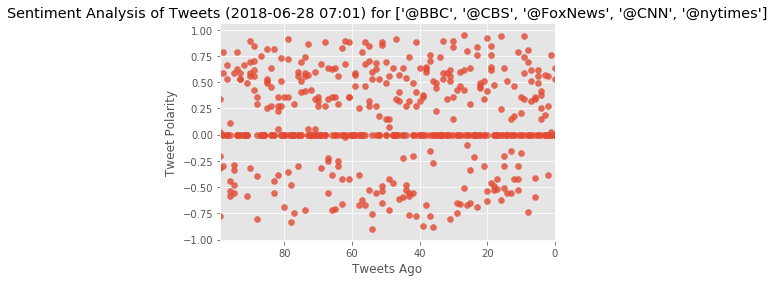

In [57]:
x_vals = dataframes["tweets_ago"]
y_vals = dataframes["compound"]
plt.scatter(x_vals,
         y_vals, marker="o", linewidth=0.5,
         alpha=0.8)

now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets ({now}) for {media_sources}")
plt.xlim([x_vals.max(),x_vals.min()])
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.savefig("Overall Sentiment of Media Tweets")
plt.show()

In [58]:
average_sentiment = dataframes.groupby("user_screen_name")["compound"].mean()
average_sentiment

user_screen_name
BBC        0.117831
CBS        0.340684
CNN        0.023387
FoxNews    0.095885
nytimes    0.003145
Name: compound, dtype: float64

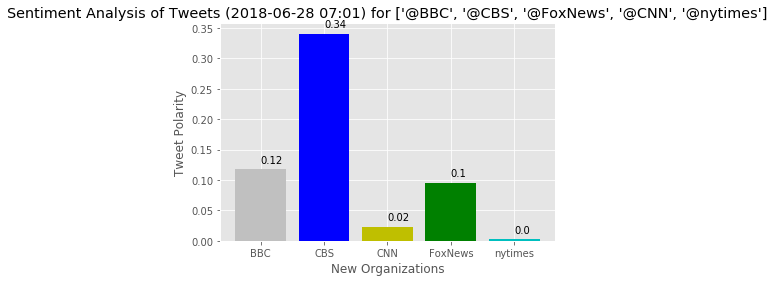

In [59]:
x_axis = np.arange(len(average_sentiment))
xlabels = average_sentiment.index
count = 0
for sentiment in average_sentiment:
    plt.text(count, sentiment+.01, str(round(sentiment,2)))
    count = count + 1
plt.bar(x_axis, average_sentiment, tick_label = xlabels, color = ['silver', 'b', 'y', 'g', 'c'])
#Set title, x axis label, and y axis label.

now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets ({now}) for {media_sources}")
plt.xlabel("New Organizations")
plt.ylabel("Tweet Polarity")
plt.savefig("Overall Sentiment of Media Tweets by Source")
plt.show()

3 Observable Trends:
1.CBS had the most positive Vader sentiment analysis.
2.NYTimes is the only media outlet with a negative Vader sentiment analysis.
3.This Vader analysis is a "point in time" anaylsis.  It would be more accurate to analyze a larger sample of tweets over a larger period of time.